In [1]:
import pandas as pd
import numpy as np
import keras
from datetime import datetime
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras import losses
from keras.constraints import maxnorm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import seaborn as sns
sns.set()
from collections import Counter
from scipy.stats import uniform
from scipy.stats import randint
import shap
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score, f1_score, classification_report
import pickle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from commons import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio
#sound_file = 'beep.wav'
from keras.callbacks import *

Using TensorFlow backend.
/Users/liuxuyang/opt/anaconda3/envs/mytensorflow/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Bitcoin

In [2]:
regs = pd.read_csv("btc_reg.csv")
btc = pd.read_csv("btc_Data.csv")
for i in range(len(btc['Date'])):
    btc['Date'][i]  =  datetime.strptime(btc['Date'][i], '%Y/%m/%d')

btc = btc.set_index("Date")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
btcData = btc[regs.columns]

In [4]:
btcData['returns'] = btcData['priceUSD'].pct_change()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
Data = btcData.drop(columns=['priceUSD'])
Data = Data[1:]

In [6]:
Data 

,difficulty14mom,difficulty30mom,difficulty3rsi,difficulty90mom,difficulty90sma,hashrate90std,hashrate90var,median_transaction_fee90rocUSD,median_transaction_feeUSD,mining_profitability,...,price90wmaUSD,sentinusd90emaUSD,sentinusdUSD,top100cap,top100cap14trx,top100cap30rsi,top100cap30trx,top100cap90rsi,top100cap90trx,returns
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,1.621380e+02,1.641620e+02,100.00,1.737230e+02,2.055500e+01,8.384389e+08,1.757449e+17,0.000,0.000,401834.0000,...,0.0,0,2.612000e+03,25.782,0.139,71.191,0.308,79.756,0.550,0.466667
2010-07-19,1.621380e+02,1.641620e+02,100.00,1.737230e+02,2.248600e+01,8.819952e+08,1.944789e+17,0.000,0.000,481473.0000,...,0.0,0,4.047000e+03,25.685,0.123,68.863,0.300,78.999,0.547,0.183196
2010-07-20,1.584060e+02,1.641620e+02,100.00,1.735570e+02,2.441400e+01,9.280542e+08,2.153212e+17,0.000,0.000,431831.0000,...,0.0,0,2.341000e+03,25.602,0.107,66.923,0.292,78.355,0.544,-0.088475
2010-07-21,1.580420e+02,1.641620e+02,100.00,1.700790e+02,2.630400e+01,9.761949e+08,2.382391e+17,0.000,0.000,460783.0000,...,0.0,0,2.122000e+03,25.638,0.092,67.334,0.284,78.431,0.541,-0.020434
2010-07-22,1.580420e+02,1.641620e+02,100.00,1.700790e+02,2.819400e+01,1.019474e+09,2.598318e+17,0.000,0.000,334641.0000,...,0.0,0,2.570000e+03,25.604,0.078,66.526,0.275,78.166,0.537,-0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,1.882952e+11,1.148115e+11,99.86,8.598887e+12,3.384949e+13,4.612156e+19,5.317997e+38,165.380,0.818,0.0577,...,18820.0,28544682257,6.114577e+09,15.236,-0.080,40.118,-0.042,45.140,0.001,0.008075
2022-11-25,1.882952e+11,1.148115e+11,99.86,8.598887e+12,3.394503e+13,4.542600e+19,5.158804e+38,214.464,0.812,0.0541,...,18759.0,28076113671,7.224812e+09,15.231,-0.075,39.880,-0.043,45.047,0.001,-0.006565
2022-11-26,1.882952e+11,1.148115e+11,99.86,8.598887e+12,3.404058e+13,4.624135e+19,5.345655e+38,255.004,0.809,0.0571,...,18701.0,27566714445,4.898449e+09,15.233,-0.070,40.069,-0.043,45.106,0.001,0.004001


In [7]:
# divide X and Y
X = Data.iloc[:,0:]
#Y = Data['returns']   # 用returns的话就用这一行，然后把下一行comment掉
Y = btcData['priceUSD'].shift(-30)[1:] # 反之亦然

In [8]:
X.head(3)

,difficulty14mom,difficulty30mom,difficulty3rsi,difficulty90mom,difficulty90sma,hashrate90std,hashrate90var,median_transaction_fee90rocUSD,median_transaction_feeUSD,mining_profitability,...,price90wmaUSD,sentinusd90emaUSD,sentinusdUSD,top100cap,top100cap14trx,top100cap30rsi,top100cap30trx,top100cap90rsi,top100cap90trx,returns
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,162.138,164.162,100.0,173.723,20.555,838438881.0,1.757449e+17,0.0,0.0,401834.0,...,0.0,0,2612.0,25.782,0.139,71.191,0.308,79.756,0.550,0.466667
2010-07-19,162.138,164.162,100.0,173.723,22.486,881995244.0,1.944789e+17,0.0,0.0,481473.0,...,0.0,0,4047.0,25.685,0.123,68.863,0.300,78.999,0.547,0.183196
2010-07-20,158.406,164.162,100.0,173.557,24.414,928054231.0,2.153212e+17,0.0,0.0,431831.0,...,0.0,0,2341.0,25.602,0.107,66.923,0.292,78.355,0.544,-0.088475


In [9]:
# Split into three data sets
X_train = X['2016-01-01':'2019-12-31']
X_val = X['2020-01-01':'2021-05-31']
X_test = X['2021-06-01':'2023-01-01']

Y_train = Y['2016-01-01':'2019-12-31']
Y_val = Y['2020-01-01':'2021-05-31']
Y_test = Y['2021-06-01':'2023-01-01']

In [10]:
estimators=[]
estimators.append(['mixmax',MinMaxScaler()])
estimators.append(['robust',RobustScaler()])
scale=Pipeline(estimators,verbose=True)
scale.fit(X_train)

[Pipeline] ............ (step 1 of 2) Processing mixmax, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing robust, total=   0.0s


Pipeline(steps=[('mixmax', MinMaxScaler()), ['robust', RobustScaler()]],
         verbose=True)

In [11]:
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)
X_val = scale.transform(X_val)

In [12]:
def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [13]:
from keras import regularizers
# define neural network model
shape=X.shape[1]
def sequential_model(initializer='normal', activation='relu', neurons=300, NUM_FEATURES=shape):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(NUM_FEATURES,), kernel_initializer=initializer, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation=activation))
    # Compile model
    adam=keras.optimizers.adam(lr=lr_schedule(0), amsgrad=True)
    #sgd=keras.optimizers.SGD(learning_rate=0.08, momentum=0.9, nesterov=False)
    model.compile(loss='logcosh', optimizer=adam, metrics=['mae'])
    return model

In [14]:
#mcp_save = ModelCheckpoint('trained_models/ANN_reg_seven_new.hdf5', save_best_only=True, monitor='val_loss', mode='auto')
#earlyStopping = EarlyStopping(monitor='val_loss', patience=100,verbose=1, mode='auto')

In [15]:
regressor=KerasRegressor(build_fn=sequential_model,epochs=1000,verbose=1, shuffle=True,use_multiprocessing=True)

In [16]:
regressor.fit(X_train,Y_train,validation_data=(X_val, Y_val))
#Audio(sound_file,autoplay=True)

2022-11-30 19:28:13.515580: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 19:28:13.517608: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Learning rate:  0.001
Train on 1461 samples, validate on 517 samples
Epoch 1/1000
1461/1461 [==============================] - 1s 786us/step - loss: 4636.4784 - mae: 4637.1724 - val_loss: 18833.6614 - val_mae: 18834.3535
Epoch 2/1000
1461/1461 [==============================] - 0s 265us/step - loss: 2743.2584 - mae: 2743.9512 - val_loss: 6128.2585 - val_mae: 6128.9517
Epoch 3/1000
1461/1461 [==============================] - 0s 260us/step - loss: 1545.8519 - mae: 1546.5447 - val_loss: 6430.2637 - val_mae: 6430.9575
Epoch 4/1000
1461/1461 [==============================] - 0s 266us/step - loss: 1296.0449 - mae: 1296.7380 - val_loss: 6555.6965 - val_mae: 6556.3896
Epoch 5/1000
1461/1461 [==============================] - 0s 283us/step - loss: 1137.8176 - mae: 1138.5103 - val_loss: 6858.2478 - val_mae: 6858.9409
Epoch 6/1000
1461/1461 [==============================] - 1s 351us/step - loss: 1049.0567 - mae: 1049.7493 - val_loss: 7548.5681 - val_mae: 7549.2617
Epoch 7/1000
1461/1461 [=====

1461/1461 [==============================] - 0s 291us/step - loss: 365.1279 - mae: 365.8185 - val_loss: 8181.2210 - val_mae: 8181.9150
Epoch 56/1000
1461/1461 [==============================] - 0s 283us/step - loss: 364.2990 - mae: 364.9890 - val_loss: 8598.1099 - val_mae: 8598.8027
Epoch 57/1000
1461/1461 [==============================] - 1s 428us/step - loss: 364.8214 - mae: 365.5129 - val_loss: 8319.3006 - val_mae: 8319.9932
Epoch 58/1000
1461/1461 [==============================] - 1s 350us/step - loss: 384.7969 - mae: 385.4875 - val_loss: 8129.6881 - val_mae: 8130.3809
Epoch 59/1000
1461/1461 [==============================] - 0s 312us/step - loss: 354.0414 - mae: 354.7322 - val_loss: 8325.4941 - val_mae: 8326.1875
Epoch 60/1000
1461/1461 [==============================] - 0s 319us/step - loss: 342.9448 - mae: 343.6352 - val_loss: 7951.3542 - val_mae: 7952.0474
Epoch 61/1000
1461/1461 [==============================] - 0s 322us/step - loss: 369.3251 - mae: 370.0153 - val_loss: 80

1461/1461 [==============================] - 0s 252us/step - loss: 278.9065 - mae: 279.5964 - val_loss: 8317.9356 - val_mae: 8318.6299
Epoch 111/1000
1461/1461 [==============================] - 0s 253us/step - loss: 281.4308 - mae: 282.1210 - val_loss: 7850.4060 - val_mae: 7851.0991
Epoch 112/1000
1461/1461 [==============================] - 0s 254us/step - loss: 270.3037 - mae: 270.9939 - val_loss: 8850.7579 - val_mae: 8851.4512
Epoch 113/1000
1461/1461 [==============================] - 0s 253us/step - loss: 275.0052 - mae: 275.6960 - val_loss: 8417.5966 - val_mae: 8418.2900
Epoch 114/1000
1461/1461 [==============================] - 0s 247us/step - loss: 259.0244 - mae: 259.7135 - val_loss: 8543.8063 - val_mae: 8544.5000
Epoch 115/1000
1461/1461 [==============================] - 0s 256us/step - loss: 274.4622 - mae: 275.1496 - val_loss: 8975.7475 - val_mae: 8976.4414
Epoch 116/1000
1461/1461 [==============================] - 0s 259us/step - loss: 283.5217 - mae: 284.2134 - val_lo

Epoch 165/1000
1461/1461 [==============================] - 0s 287us/step - loss: 234.9040 - mae: 235.5931 - val_loss: 8656.6268 - val_mae: 8657.3203
Epoch 166/1000
1461/1461 [==============================] - 0s 270us/step - loss: 247.9033 - mae: 248.5940 - val_loss: 7711.1931 - val_mae: 7711.8867
Epoch 167/1000
1461/1461 [==============================] - 0s 279us/step - loss: 248.8437 - mae: 249.5335 - val_loss: 8204.5707 - val_mae: 8205.2627
Epoch 168/1000
1461/1461 [==============================] - 0s 270us/step - loss: 238.5077 - mae: 239.1952 - val_loss: 8067.8182 - val_mae: 8068.5112
Epoch 169/1000
1461/1461 [==============================] - 0s 267us/step - loss: 226.9380 - mae: 227.6263 - val_loss: 8472.7195 - val_mae: 8473.4121
Epoch 170/1000
1461/1461 [==============================] - 0s 275us/step - loss: 236.9844 - mae: 237.6750 - val_loss: 8445.6539 - val_mae: 8446.3477
Epoch 171/1000
1461/1461 [==============================] - 0s 266us/step - loss: 248.8876 - mae: 24

1461/1461 [==============================] - 0s 265us/step - loss: 218.3432 - mae: 219.0311 - val_loss: 8592.6005 - val_mae: 8593.2939
Epoch 220/1000
1461/1461 [==============================] - 0s 265us/step - loss: 225.4770 - mae: 226.1667 - val_loss: 7960.0334 - val_mae: 7960.7261
Epoch 221/1000
1461/1461 [==============================] - 0s 301us/step - loss: 229.0850 - mae: 229.7749 - val_loss: 8004.6870 - val_mae: 8005.3804
Epoch 222/1000
1461/1461 [==============================] - 0s 256us/step - loss: 223.4431 - mae: 224.1324 - val_loss: 8072.0137 - val_mae: 8072.7070
Epoch 223/1000
1461/1461 [==============================] - 0s 257us/step - loss: 217.9363 - mae: 218.6254 - val_loss: 7953.0833 - val_mae: 7953.7759
Epoch 224/1000
1461/1461 [==============================] - 0s 250us/step - loss: 228.9251 - mae: 229.6141 - val_loss: 8172.8108 - val_mae: 8173.5039
Epoch 225/1000
1461/1461 [==============================] - 0s 261us/step - loss: 205.8754 - mae: 206.5639 - val_lo

Epoch 274/1000
1461/1461 [==============================] - 0s 252us/step - loss: 223.1484 - mae: 223.8364 - val_loss: 8031.0208 - val_mae: 8031.7139
Epoch 275/1000
1461/1461 [==============================] - 0s 251us/step - loss: 190.4372 - mae: 191.1280 - val_loss: 7676.6274 - val_mae: 7677.3208
Epoch 276/1000
1461/1461 [==============================] - 0s 255us/step - loss: 194.2061 - mae: 194.8954 - val_loss: 8214.4758 - val_mae: 8215.1689
Epoch 277/1000
1461/1461 [==============================] - 0s 252us/step - loss: 210.9564 - mae: 211.6449 - val_loss: 7955.4773 - val_mae: 7956.1714
Epoch 278/1000
1461/1461 [==============================] - 0s 250us/step - loss: 183.5784 - mae: 184.2661 - val_loss: 7870.3141 - val_mae: 7871.0078
Epoch 279/1000
1461/1461 [==============================] - 0s 252us/step - loss: 188.6658 - mae: 189.3537 - val_loss: 8039.3029 - val_mae: 8039.9956
Epoch 280/1000
1461/1461 [==============================] - 0s 251us/step - loss: 186.0599 - mae: 18

1461/1461 [==============================] - 0s 268us/step - loss: 176.3279 - mae: 177.0182 - val_loss: 8094.4059 - val_mae: 8095.0991
Epoch 329/1000
1461/1461 [==============================] - 0s 260us/step - loss: 181.5197 - mae: 182.2103 - val_loss: 8018.0352 - val_mae: 8018.7290
Epoch 330/1000
1461/1461 [==============================] - 0s 289us/step - loss: 176.3007 - mae: 176.9890 - val_loss: 8094.7636 - val_mae: 8095.4570
Epoch 331/1000
1461/1461 [==============================] - 0s 261us/step - loss: 187.2730 - mae: 187.9599 - val_loss: 8071.9427 - val_mae: 8072.6357
Epoch 332/1000
1461/1461 [==============================] - 0s 271us/step - loss: 169.2580 - mae: 169.9476 - val_loss: 8190.1958 - val_mae: 8190.8896
Epoch 333/1000
1461/1461 [==============================] - 0s 263us/step - loss: 176.6611 - mae: 177.3499 - val_loss: 7710.5019 - val_mae: 7711.1953
Epoch 334/1000
1461/1461 [==============================] - 0s 268us/step - loss: 177.9824 - mae: 178.6684 - val_lo

Epoch 383/1000
1461/1461 [==============================] - 0s 260us/step - loss: 170.0885 - mae: 170.7762 - val_loss: 8315.3497 - val_mae: 8316.0439
Epoch 384/1000
1461/1461 [==============================] - 0s 270us/step - loss: 165.8065 - mae: 166.4964 - val_loss: 8309.0054 - val_mae: 8309.6982
Epoch 385/1000
1461/1461 [==============================] - 0s 268us/step - loss: 164.9764 - mae: 165.6632 - val_loss: 8133.4213 - val_mae: 8134.1143
Epoch 386/1000
1461/1461 [==============================] - 0s 275us/step - loss: 174.3392 - mae: 175.0263 - val_loss: 8123.6694 - val_mae: 8124.3628
Epoch 387/1000
1461/1461 [==============================] - 0s 272us/step - loss: 182.2098 - mae: 182.8950 - val_loss: 8302.3637 - val_mae: 8303.0566
Epoch 388/1000
1461/1461 [==============================] - 0s 305us/step - loss: 162.5675 - mae: 163.2563 - val_loss: 8090.4001 - val_mae: 8091.0938
Epoch 389/1000
1461/1461 [==============================] - 0s 276us/step - loss: 187.4613 - mae: 18

1461/1461 [==============================] - 0s 266us/step - loss: 155.8830 - mae: 156.5726 - val_loss: 7907.0919 - val_mae: 7907.7837
Epoch 438/1000
1461/1461 [==============================] - 0s 247us/step - loss: 151.7088 - mae: 152.3971 - val_loss: 8124.4193 - val_mae: 8125.1133
Epoch 439/1000
1461/1461 [==============================] - 0s 275us/step - loss: 170.7872 - mae: 171.4741 - val_loss: 7783.1457 - val_mae: 7783.8384
Epoch 440/1000
1461/1461 [==============================] - 0s 257us/step - loss: 152.9263 - mae: 153.6126 - val_loss: 8101.9181 - val_mae: 8102.6118
Epoch 441/1000
1461/1461 [==============================] - 0s 263us/step - loss: 156.6589 - mae: 157.3482 - val_loss: 8162.8147 - val_mae: 8163.5078
Epoch 442/1000
1461/1461 [==============================] - 0s 266us/step - loss: 168.2304 - mae: 168.9202 - val_loss: 7946.8388 - val_mae: 7947.5317
Epoch 443/1000
1461/1461 [==============================] - 0s 244us/step - loss: 151.3306 - mae: 152.0165 - val_lo

Epoch 492/1000
1461/1461 [==============================] - 0s 279us/step - loss: 162.0039 - mae: 162.6930 - val_loss: 8282.5652 - val_mae: 8283.2588
Epoch 493/1000
1461/1461 [==============================] - 0s 263us/step - loss: 153.5873 - mae: 154.2753 - val_loss: 7982.3222 - val_mae: 7983.0156
Epoch 494/1000
1461/1461 [==============================] - 0s 256us/step - loss: 148.6084 - mae: 149.2973 - val_loss: 8127.1699 - val_mae: 8127.8638
Epoch 495/1000
1461/1461 [==============================] - 0s 262us/step - loss: 146.3834 - mae: 147.0709 - val_loss: 8107.2094 - val_mae: 8107.9023
Epoch 496/1000
1461/1461 [==============================] - 0s 244us/step - loss: 137.7872 - mae: 138.4756 - val_loss: 8173.1230 - val_mae: 8173.8154
Epoch 497/1000
1461/1461 [==============================] - 0s 246us/step - loss: 149.8014 - mae: 150.4863 - val_loss: 8395.6365 - val_mae: 8396.3301
Epoch 498/1000
1461/1461 [==============================] - 0s 251us/step - loss: 157.3805 - mae: 15

1461/1461 [==============================] - 0s 246us/step - loss: 169.6976 - mae: 170.3846 - val_loss: 8298.6319 - val_mae: 8299.3252
Epoch 547/1000
1461/1461 [==============================] - 0s 241us/step - loss: 152.1664 - mae: 152.8536 - val_loss: 7859.7274 - val_mae: 7860.4214
Epoch 548/1000
1461/1461 [==============================] - 0s 244us/step - loss: 143.0471 - mae: 143.7337 - val_loss: 8203.5196 - val_mae: 8204.2129
Epoch 549/1000
1461/1461 [==============================] - 0s 244us/step - loss: 133.9345 - mae: 134.6200 - val_loss: 8246.1162 - val_mae: 8246.8096
Epoch 550/1000
1461/1461 [==============================] - 0s 241us/step - loss: 143.6161 - mae: 144.2996 - val_loss: 8011.4409 - val_mae: 8012.1338
Epoch 551/1000
1461/1461 [==============================] - 0s 244us/step - loss: 152.3790 - mae: 153.0655 - val_loss: 8042.4219 - val_mae: 8043.1152
Epoch 552/1000
1461/1461 [==============================] - 0s 241us/step - loss: 155.0117 - mae: 155.6979 - val_lo

Epoch 601/1000
1461/1461 [==============================] - 0s 244us/step - loss: 151.9283 - mae: 152.6150 - val_loss: 7970.8897 - val_mae: 7971.5825
Epoch 602/1000
1461/1461 [==============================] - 0s 246us/step - loss: 142.4955 - mae: 143.1789 - val_loss: 8099.4406 - val_mae: 8100.1338
Epoch 603/1000
1461/1461 [==============================] - 0s 245us/step - loss: 131.0167 - mae: 131.7049 - val_loss: 8173.1519 - val_mae: 8173.8462
Epoch 604/1000
1461/1461 [==============================] - 0s 246us/step - loss: 132.1958 - mae: 132.8820 - val_loss: 8226.4794 - val_mae: 8227.1729
Epoch 605/1000
1461/1461 [==============================] - 0s 247us/step - loss: 136.5374 - mae: 137.2239 - val_loss: 8200.6646 - val_mae: 8201.3574
Epoch 606/1000
1461/1461 [==============================] - 0s 243us/step - loss: 142.7676 - mae: 143.4546 - val_loss: 7642.5558 - val_mae: 7643.2490
Epoch 607/1000
1461/1461 [==============================] - 0s 249us/step - loss: 161.2174 - mae: 16

1461/1461 [==============================] - 0s 266us/step - loss: 131.4761 - mae: 132.1619 - val_loss: 8180.3378 - val_mae: 8181.0317
Epoch 656/1000
1461/1461 [==============================] - 0s 289us/step - loss: 133.0101 - mae: 133.6934 - val_loss: 8243.2539 - val_mae: 8243.9473
Epoch 657/1000
1461/1461 [==============================] - 0s 265us/step - loss: 133.2761 - mae: 133.9611 - val_loss: 8217.1942 - val_mae: 8217.8877
Epoch 658/1000
1461/1461 [==============================] - 0s 267us/step - loss: 131.1154 - mae: 131.8000 - val_loss: 8146.8287 - val_mae: 8147.5215
Epoch 659/1000
1461/1461 [==============================] - 0s 274us/step - loss: 130.0757 - mae: 130.7556 - val_loss: 8253.4149 - val_mae: 8254.1084
Epoch 660/1000
1461/1461 [==============================] - 0s 261us/step - loss: 150.5253 - mae: 151.2104 - val_loss: 8025.5661 - val_mae: 8026.2588
Epoch 661/1000
1461/1461 [==============================] - 0s 268us/step - loss: 130.5956 - mae: 131.2800 - val_lo

Epoch 710/1000
1461/1461 [==============================] - 0s 260us/step - loss: 132.8234 - mae: 133.5094 - val_loss: 8564.0713 - val_mae: 8564.7646
Epoch 711/1000
1461/1461 [==============================] - 0s 261us/step - loss: 142.6758 - mae: 143.3601 - val_loss: 8215.6763 - val_mae: 8216.3672
Epoch 712/1000
1461/1461 [==============================] - 0s 262us/step - loss: 131.5641 - mae: 132.2508 - val_loss: 8502.0790 - val_mae: 8502.7725
Epoch 713/1000
1461/1461 [==============================] - 0s 260us/step - loss: 130.4821 - mae: 131.1681 - val_loss: 8391.4923 - val_mae: 8392.1855
Epoch 714/1000
1461/1461 [==============================] - 0s 252us/step - loss: 121.5618 - mae: 122.2462 - val_loss: 8333.3045 - val_mae: 8333.9971
Epoch 715/1000
1461/1461 [==============================] - 0s 254us/step - loss: 124.5952 - mae: 125.2791 - val_loss: 8168.5920 - val_mae: 8169.2852
Epoch 716/1000
1461/1461 [==============================] - 0s 255us/step - loss: 117.5929 - mae: 11

1461/1461 [==============================] - 0s 266us/step - loss: 122.9379 - mae: 123.6241 - val_loss: 8349.7320 - val_mae: 8350.4238
Epoch 765/1000
1461/1461 [==============================] - 0s 286us/step - loss: 143.7488 - mae: 144.4347 - val_loss: 7957.4366 - val_mae: 7958.1294
Epoch 766/1000
1461/1461 [==============================] - 0s 273us/step - loss: 156.9257 - mae: 157.6113 - val_loss: 8656.6683 - val_mae: 8657.3604
Epoch 767/1000
1461/1461 [==============================] - 0s 252us/step - loss: 169.2264 - mae: 169.9120 - val_loss: 8662.2120 - val_mae: 8662.9053
Epoch 768/1000
1461/1461 [==============================] - 0s 252us/step - loss: 132.0498 - mae: 132.7354 - val_loss: 8189.6920 - val_mae: 8190.3857
Epoch 769/1000
1461/1461 [==============================] - 0s 262us/step - loss: 133.9159 - mae: 134.6013 - val_loss: 8180.8257 - val_mae: 8181.5195
Epoch 770/1000
1461/1461 [==============================] - 0s 251us/step - loss: 130.7452 - mae: 131.4334 - val_lo

1461/1461 [==============================] - 0s 249us/step - loss: 115.2241 - mae: 115.9090 - val_loss: 8244.6281 - val_mae: 8245.3213
Epoch 819/1000
1461/1461 [==============================] - 0s 248us/step - loss: 114.4082 - mae: 115.0970 - val_loss: 8359.5233 - val_mae: 8360.2178
Epoch 820/1000
1461/1461 [==============================] - 0s 248us/step - loss: 120.7408 - mae: 121.4229 - val_loss: 8367.6674 - val_mae: 8368.3594
Epoch 821/1000
1461/1461 [==============================] - 0s 255us/step - loss: 122.5300 - mae: 123.2139 - val_loss: 8249.1790 - val_mae: 8249.8730
Epoch 822/1000
1461/1461 [==============================] - 0s 255us/step - loss: 129.3622 - mae: 130.0486 - val_loss: 8509.6416 - val_mae: 8510.3350
Epoch 823/1000
1461/1461 [==============================] - 0s 264us/step - loss: 135.8864 - mae: 136.5730 - val_loss: 8293.9506 - val_mae: 8294.6445
Epoch 824/1000
1461/1461 [==============================] - 0s 248us/step - loss: 118.8847 - mae: 119.5688 - val_lo

Epoch 873/1000
1461/1461 [==============================] - 0s 292us/step - loss: 120.0991 - mae: 120.7857 - val_loss: 8401.6973 - val_mae: 8402.3906
Epoch 874/1000
1461/1461 [==============================] - 0s 277us/step - loss: 136.0487 - mae: 136.7352 - val_loss: 8450.7378 - val_mae: 8451.4316
Epoch 875/1000
1461/1461 [==============================] - 0s 267us/step - loss: 134.1739 - mae: 134.8573 - val_loss: 8561.6878 - val_mae: 8562.3818
Epoch 876/1000
1461/1461 [==============================] - 0s 264us/step - loss: 114.4109 - mae: 115.0934 - val_loss: 8356.4183 - val_mae: 8357.1113
Epoch 877/1000
1461/1461 [==============================] - 0s 270us/step - loss: 109.9671 - mae: 110.6499 - val_loss: 8188.6804 - val_mae: 8189.3735
Epoch 878/1000
1461/1461 [==============================] - 0s 274us/step - loss: 110.4373 - mae: 111.1216 - val_loss: 8400.8857 - val_mae: 8401.5791
Epoch 879/1000
1461/1461 [==============================] - 0s 265us/step - loss: 115.7937 - mae: 11

1461/1461 [==============================] - 0s 258us/step - loss: 115.4398 - mae: 116.1254 - val_loss: 8188.6099 - val_mae: 8189.3037
Epoch 928/1000
1461/1461 [==============================] - 0s 282us/step - loss: 124.0877 - mae: 124.7734 - val_loss: 8499.9806 - val_mae: 8500.6748
Epoch 929/1000
1461/1461 [==============================] - 0s 261us/step - loss: 106.1354 - mae: 106.8215 - val_loss: 8377.6659 - val_mae: 8378.3584
Epoch 930/1000
1461/1461 [==============================] - 0s 268us/step - loss: 124.2397 - mae: 124.9262 - val_loss: 8307.1086 - val_mae: 8307.8027
Epoch 931/1000
1461/1461 [==============================] - 0s 260us/step - loss: 106.4754 - mae: 107.1573 - val_loss: 8368.7608 - val_mae: 8369.4541
Epoch 932/1000
1461/1461 [==============================] - 0s 275us/step - loss: 106.3215 - mae: 107.0076 - val_loss: 8375.8836 - val_mae: 8376.5762
Epoch 933/1000
1461/1461 [==============================] - 0s 266us/step - loss: 107.6066 - mae: 108.2907 - val_lo

Epoch 982/1000
1461/1461 [==============================] - 0s 267us/step - loss: 116.8883 - mae: 117.5704 - val_loss: 8524.2416 - val_mae: 8524.9355
Epoch 983/1000
1461/1461 [==============================] - 0s 257us/step - loss: 137.0277 - mae: 137.7111 - val_loss: 8519.5200 - val_mae: 8520.2129
Epoch 984/1000
1461/1461 [==============================] - 0s 262us/step - loss: 108.3072 - mae: 108.9915 - val_loss: 8457.2195 - val_mae: 8457.9121
Epoch 985/1000
1461/1461 [==============================] - 0s 272us/step - loss: 106.8702 - mae: 107.5542 - val_loss: 8599.0988 - val_mae: 8599.7920
Epoch 986/1000
1461/1461 [==============================] - 0s 262us/step - loss: 125.5394 - mae: 126.2252 - val_loss: 8538.1386 - val_mae: 8538.8291
Epoch 987/1000
1461/1461 [==============================] - 0s 266us/step - loss: 109.9260 - mae: 110.6113 - val_loss: 8626.8533 - val_mae: 8627.5469
Epoch 988/1000
1461/1461 [==============================] - 0s 261us/step - loss: 115.6181 - mae: 11

In [17]:
# for check
y_train_pred=regressor.predict(X_train)
r2_score(Y_train, y_train_pred) #training score

1461/1461 [==============================] - 0s 127us/step


0.9966428561796283

In [18]:
y_pred=regressor.predict(X_test)
pre_df = pd.DataFrame(zip(Y_test,y_pred),columns=['y_test','y_pred'])
pre_df.index = Y_test.index
pre_df

546/546 [==============================] - 0s 83us/step


,y_test,y_pred
Date,,
2021-06-01,33731.0,34394.320312
2021-06-02,33285.0,34062.855469
2021-06-03,34298.0,33482.195312
2021-06-04,35271.0,34105.074219
2021-06-05,34100.0,33992.710938
...,...,...
2022-11-24,NaN,24159.792969
2022-11-25,NaN,23844.636719
2022-11-26,NaN,23678.773438


In [19]:
r2=r2_score(Y_test[0:-30],y_pred[0:-30]) #testing score/ r^2
r2

0.528306537077153

In [20]:
rmse=np.sqrt(mean_squared_error(Y_test[0:-30],y_pred[0:-30])) #rmse
rmse#太特么大了，感觉数据集划分有问题

9293.30533975775

In [21]:
pre_df['pred_returns'] = pre_df['y_pred'].pct_change()

In [22]:
pre_df

,y_test,y_pred,pred_returns
Date,,,
2021-06-01,33731.0,34394.320312,NaN
2021-06-02,33285.0,34062.855469,-0.009637
2021-06-03,34298.0,33482.195312,-0.017047
2021-06-04,35271.0,34105.074219,0.018603
2021-06-05,34100.0,33992.710938,-0.003295
...,...,...,...
2022-11-24,NaN,24159.792969,-0.012123
2022-11-25,NaN,23844.636719,-0.013045
2022-11-26,NaN,23678.773438,-0.006956


<AxesSubplot:>

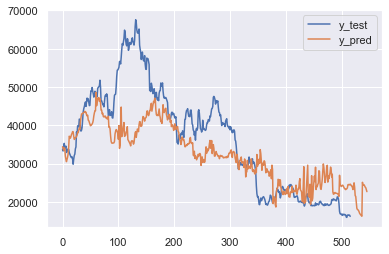

In [23]:
pd.DataFrame(zip(Y_test,y_pred),columns=['y_test','y_pred']).plot()

In [25]:
pre_df.to_csv("btc_NN.csv")